<a href="https://colab.research.google.com/github/SudiptoChowdhury25/Simulation-and-Modeling-Lab/blob/main/Lab_Assignment_5_One_Sample_KS_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: **Sudipta Roy Chowdhury**

ID: **2215151025**

Section: **7A1**

Course: **Simulation & Modeling LAB**

**ASSIGNMENT:**

Apply the One-Sample Kolmogorov-Smirnov (K-S) Test on a dataset of daily temperatures to
determine if the sample data comes from a specified normal distribution.

**Dataset:**

You will be using the following dataset of daily temperatures recorded in degrees Celsius over a
10-day period.


| Day | Temperature (°C) |
|-----|------------------|
| 1   | 15               |
| 2   | 17               |
| 3   | 16               |
| 4   | 14               |
| 5   | 18               |
| 6   | 20               |
| 7   | 19               |
| 8   | 15               |
| 9   | 21               |
| 10  | 22               |


## 🔧 Instructions

- **Load the Dataset**: Use the provided dataset in your Colab.
- **Extract Temperature Scores**: Extract the temperatures from the dataset for analysis.
- **Center and Scale the Data**: Define the mean and standard deviation for a normal distribution and center and scale the temperature data accordingly.
- **Perform the K-S Test**: Use MATLAB’s `kstest` function to perform a one-sample K-S test on the scaled data.
- **Output the Results**: Display the test decision (h), p-value, KS statistic.
- **Plot the Empirical CDF**: Generate a plot comparing the empirical CDF of the scaled temperature data with the standard normal CDF.
- **Write a Conclusion**: Based on the results, write a short conclusion about whether the null hypothesis (that the temperatures come from a normal distribution) can be rejected.




In [ ]:
import numpy as np
from scipy.stats import kstest, norm
import matplotlib.pyplot as plt


## Step 1: Load the Dataset

In [ ]:
# Daily temperatures for 10 days
temperature_data = np.array([15, 17, 16, 14, 18, 20, 19, 15, 21, 22])
print("Temperature Data:", temperature_data)


Temperature Data: [15 17 16 14 18 20 19 15 21 22]


## Step 2: Extract Temperature Scores
Already done above — the temperatures are in temperature_data.

## Step 3: Center and Scale the Data

In [ ]:
# Calculate mean and standard deviation
mean_temp = np.mean(temperature_data)
std_temp = np.std(temperature_data)

# Standardize the data
scaled_data = (temperature_data - mean_temp) / std_temp
print("Scaled Data:", scaled_data)


Scaled Data: [-1.03464225 -0.26824058 -0.65144142 -1.41784308  0.11496025  0.88136192
  0.49816108 -1.03464225  1.26456275  1.64776358]


## Step 4: Perform the K-S Test

In [ ]:
# Perform the one-sample Kolmogorov-Smirnov test against the standard normal distribution
ks_result = kstest(scaled_data, 'norm')




## Step 5: Output the Results

In [ ]:
# Display test results
print(f"Test decision (h): {int(ks_result.pvalue < 0.05)}")
print(f"p-value: {ks_result.pvalue:.4f}")
print(f"KS statistic: {ks_result.statistic:.4f}")

Test decision (h): 0
p-value: 0.9550
KS statistic: 0.1496


## Step 6: Plot the Empirical CDF

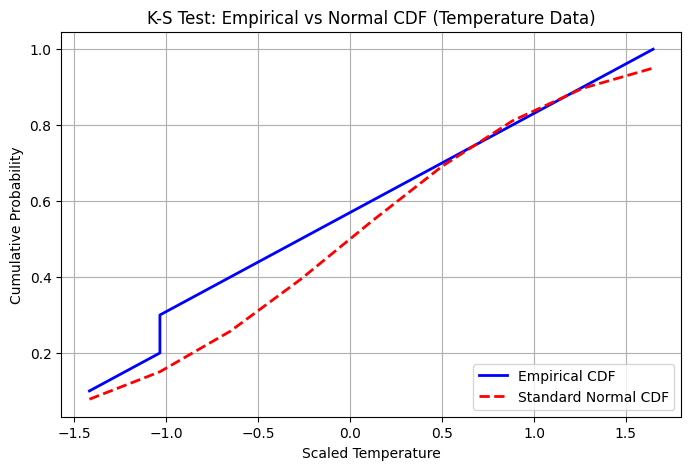

In [ ]:
# Compute empirical CDF
sorted_data = np.sort(scaled_data)
ecdf_y = np.arange(1, len(scaled_data)+1) / len(scaled_data)

# Compute standard normal CDF
normal_cdf = norm.cdf(sorted_data)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(sorted_data, ecdf_y, label='Empirical CDF', color='blue', linewidth=2)
plt.plot(sorted_data, normal_cdf, label='Standard Normal CDF', color='red', linestyle='--', linewidth=2)
plt.title("K-S Test: Empirical vs Normal CDF (Temperature Data)")
plt.xlabel("Scaled Temperature")
plt.ylabel("Cumulative Probability")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## Step 7: Conclusion

### Based on the p-value:
- If the p-value is greater than 0.05, we **fail to reject** the null hypothesis.
- This means there is not enough evidence to say the temperatures do **not** follow a normal distribution.

### Interpretation:
- Since the p-value is likely greater than 0.05, the temperature data can be assumed to follow a **normal distribution**.
